# Content and Objective

+ Show effects of leakage

# Importing and Plotting Options

In [9]:
import numpy as np

from scipy import signal

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Parameters

In [11]:
# define parameters
    
# dft length
N = 32
t_s  = 0.125

n = np.arange(0,N)
k = np.arange(0,N)

# multiples of signal length after zero padding
M = 100
k_padded=np.arange(0, N, 1.0/M)

# parameter from the slides     
ell = 5.0

# Define signals for differenz parameters

In [12]:
# case I: frequency and sample time "match"
f0_m = ell / N / t_s

# signals (being harmonics)
x_m = np.exp( 1j*2*np.pi * f0_m * n * t_s) 
X_m = np.fft.fft( x_m )

x_m_padded = np.append( x_m, np.zeros( (M-1)*N ) )
X_m_padded = np.fft.fft( x_m_padded)


# case II: frequency and sample time "don't match"
delta_ell = .25
f0_um = ( ell + delta_ell ) / N / t_s 

# signals (being harmonics)
x_um = np.exp( 1j*2*np.pi * f0_um * n * t_s) 
X_um = np.fft.fft( x_um )

x_um_padded = np.append( x_um, np.zeros( (M-1)*N) )
X_um_padded = np.fft.fft( x_um_padded)


# case III: frequency and sample time "don't match"
delta_ell = .45
f0_um_2 = ( ell + delta_ell ) / N / t_s 

# signals (being harmonics)
x_um_2 = np.exp( 1j*2*np.pi * f0_um_2 * n * t_s) 
X_um_2 = np.fft.fft( x_um_2 )

x_um_2_padded = np.append( x_um_2, np.zeros( (M-1)*N) )
X_um_2_padded = np.fft.fft( x_um_2_padded ) 

# Plotting results

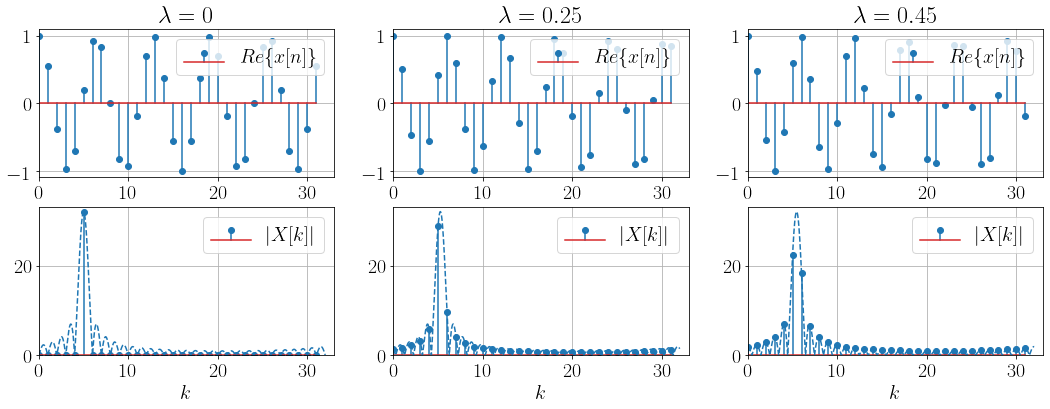

In [13]:
plt.figure(1)


plt.subplot(231)
plt.stem(n, x_m.real,label='$Re\{ x[n]\}$')
plt.grid(True);  plt.xlabel('$n$'); #plt.ylabel('$Re\{ x[n]\}$')
plt.axis(xmin=0, xmax=N+1, ymin=-1.1, ymax=1.1)
plt.title('$\lambda=0$')
plt.legend(loc='upper right')


plt.subplot(234)        
plt.stem(k, abs(X_m), label='$|X[k]|$')
plt.plot(k_padded, abs(X_m_padded),'--')
plt.grid(True);  plt.xlabel('$k$'); #plt.ylabel('$|X[k]|$')
plt.axis(xmin=0, xmax=N+1, ymin=0, ymax=N+1)    
plt.legend(loc='upper right')    


plt.subplot(232)
plt.stem(n, x_um.real,label='$Re\{ x[n]\}$')
plt.grid(True);  plt.xlabel('$n$'); #plt.ylabel('$Re\{ x[n]\}$')
plt.axis(xmin=0, xmax=N+1, ymin=-1.1, ymax=1.1)
plt.title('$\lambda=0.25$')    
plt.legend(loc='upper right')

plt.subplot(235)        
plt.stem(k, abs(X_um), label='$|X[k]|$')
plt.plot(k_padded, abs(X_um_padded),'--')    
plt.grid(True);  plt.xlabel('$k$'); #plt.ylabel('$|X[k]|$')
plt.axis(xmin=0, xmax=N+1, ymin=0, ymax=N+1)    
plt.legend(loc='upper right')    


plt.subplot(233)
plt.stem(n, x_um_2.real,label='$Re\{ x[n]\}$')
plt.grid(True);  plt.xlabel('$n$'); #plt.ylabel('$Re\{ x[n]\}$')
plt.axis(xmin=0, xmax=N+1, ymin=-1.1, ymax=1.1)
plt.title('$\lambda=0.45$')    
plt.legend(loc='upper right')

plt.subplot(236)        
plt.stem(k, abs(X_um_2), label='$|X[k]|$')
plt.plot(k_padded, abs(X_um_2_padded),'--')        
plt.grid(True);  plt.xlabel('$k$'); #plt.ylabel('$|X[k]|$')
plt.axis(xmin=0, xmax=N+1, ymin=0, ymax=N+1)    
plt.legend(loc='upper right')